In [239]:

%%javascript

IPython.keyboard_manager.command_shortcuts.add_shortcut('Ctrl-k', {
    help : 'move up selected cells',
    help_index : 'jupyter-notebook:move-selection-up',
    handler : function (event) {
        IPython.notebook.move_selection_up();
        return false;
    }}
);

IPython.keyboard_manager.command_shortcuts.add_shortcut('Ctrl-j', {
    help : 'move down selected cells',
    help_index : 'jupyter-notebook:move-selection-down',
    handler :  function (event) {
        IPython.notebook.move_selection_down();
        return false;
    }}
);

<IPython.core.display.Javascript object>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inline as inline

%matplotlib inline

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 23)
pd.set_option('display.max_rows', 100)

pd.options.mode.chained_assignment = None

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

df = pd.read_csv('events.csv', low_memory = False)

df.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,1011288,1011288,1011288,82756,563838,564284,563836,563836,563836,221699,48967,3598,82796,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378
unique,793805,11,27624,227,3574,202,5,8,63,35310,5851,14,24,4,7,2,1939,93,46,4,282,121,343
top,2018-05-15 15:56:06,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",Iphone,CustomerService,google,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,11,528931,2771,28323,4282,50916,243014,190833,132960,594,1207,1528,58153,50240,44193,60480,15819,24996,84308,44239,30009,19675,22611


In [3]:
df_campaign_entries = df.loc[df['campaign_source'].notnull()]
df_campaign_person = df_campaign_entries.drop_duplicates('person')
df_campaign_person.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,21306,21306,21306,21285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,21216,1,21306,198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
top,2018-05-15 15:56:06,ad campaign hit,8ae66f6e,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,21306,1,7510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


La cantidad de gente que entro a la pagina por campaña por lo menos una vez es 21306

De los entries que son de campaign_source tenemos 82796

In [4]:
df_campaign = df.loc[df['campaign_source'].notnull()]
df_campaign.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,82796,82796,82796,82725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,82013,1,21306,227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
top,2018-06-04 20:11:05,ad campaign hit,a202cfba,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,82796,279,28314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Actividad de usuarios relacionados con alguna campaña

In [5]:
campaign_users = df_campaign['person'].drop_duplicates()
campaign_users.describe()

count        21306
unique       21306
top       8ae66f6e
freq             1
Name: person, dtype: object

In [6]:
df_conversion_campaign = df.loc[df['person'].isin(campaign_users)]
df_conversion_campaign = df_conversion_campaign.loc[df_conversion_campaign['event'] == 'conversion']
conversion_person = df_conversion_campaign['person'].drop_duplicates()
df_conversion_campaign.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,962,962,962,0.0,962,962,962,962,962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,962,1,559,0.0,414,107,4,8,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
top,2018-05-14 01:34:13,conversion,252adec6,NaN,6371.0,Samsung Galaxy J5,Bom,16GB,Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,962,15,NaN,29,71,448,469,295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Compra de usuarios que tuvieron relacion con alguna campaña

In [11]:
df_conversion_campaign['timestamp'] = pd.to_datetime(df_conversion_campaign['timestamp'])
df_conversion_campaign['month'] = df_conversion_campaign['timestamp'].dt.month
df_conversion_campaign['count']=1
df_conversion_month = df_conversion_campaign.groupby('month').agg({'count':'sum'}).reset_index()

df_conversion_month.columns = ['month','conversions']

Estas son las compras en la pagina dado los meses por usuarios que alguna vez entraron a la pagina via campaña

In [12]:
df_campaign['timestamp'] = pd.to_datetime(df_campaign['timestamp'])
df_campaign['month'] = df_campaign['timestamp'].dt.month
df_campaign['count'] = 1
df_campaign_month = df_campaign.groupby('month').agg({'count':'sum'}).reset_index()
df_campaign_month.columns = ['month','people of campaign']

In [13]:
month_conversions_people = pd.merge(df_campaign_month, df_conversion_month, on='month', how='inner')
month_conversions_people

,month,people of campaign,conversions
0,1,1696,62
1,2,2339,73
2,3,6865,255
3,4,10880,287
4,5,38102,259
5,6,22914,26


Text(0.5,1,'Ingreso de personas involucradas en campaña al sitio')

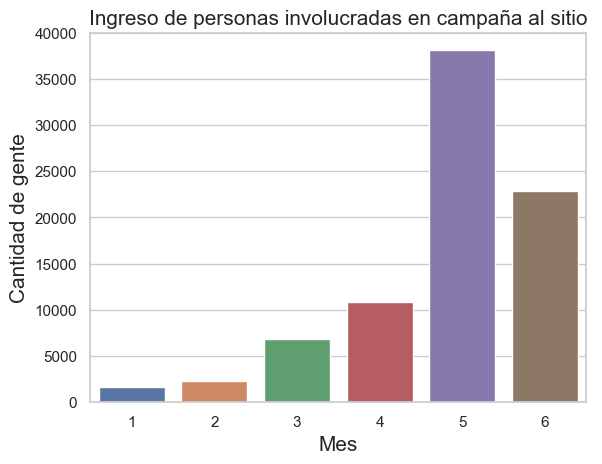

In [14]:
g =sns.barplot(x="month", y="people of campaign", data=month_conversions_people)
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel("Mes", fontsize=15)
g.set_ylabel("Cantidad de gente", fontsize=15)
g.set_title("Ingreso de personas involucradas en campaña al sitio", fontsize=15)


Viendo este grafico diriamos que los meses con mayores ventas serian 5 y 6 ya que tiene mas eventos en la pagina

Text(0.5,1,'Compras de personas involucradas en campaña al sitio')

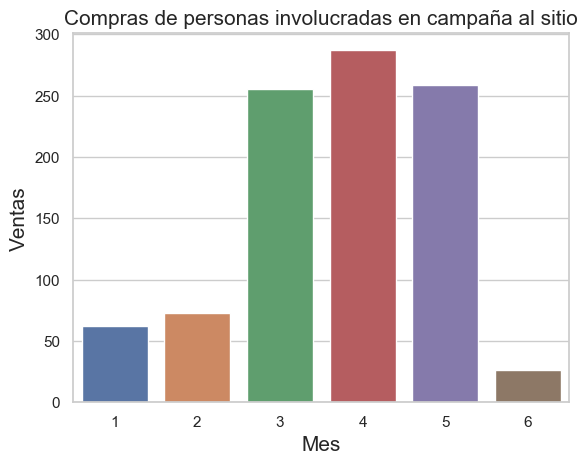

In [15]:
g =sns.barplot(x="month", y="conversions", data=month_conversions_people)
g.set_xlabel("Mes", fontsize=15)
g.set_ylabel("Ventas", fontsize=15)
g.set_title("Compras de personas involucradas en campaña al sitio", fontsize=15)


Podemos ver que este no fue el caso ya que el mes 4 fue el que consigio mas ventas